This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
#MESH = 'TRI06-SUPERFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'


# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

In [2]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Problem = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [3]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.FIXED_BOUNDARY = False
Problem.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Problem.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Problem.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Problem.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Problem.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Problem.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [4]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Problem.QuadratureOrder2D = 8   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Problem.EXT_ITER = 10           # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Problem.EXT_TOL = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Problem.INT_ITER = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Problem.INT_TOL = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Problem.beta = 1.0e6            # NITSCHE'S METHOD PENALTY PARAMETER
Problem.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Problem.alpha = 1.0             # AIKITEN'S METHOD RELAXATION PARAMETER
Problem.EXTR_R0 = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.EXTR_Z0 = 0.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.SADD_R0 = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.SADD_Z0 = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.OPTI_ITMAX = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Problem.OPTI_TOL = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [5]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Problem.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e7)
coil2 = Coil(index = 2,
             dim = Problem.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e7)
coil3 = Coil(index = 3,
             dim = Problem.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e7)
coil4 = Coil(index = 4,
             dim = Problem.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e7)
coil5 = Coil(index = 5,
             dim = Problem.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e7)
coil6 = Coil(index = 6,
             dim = Problem.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e7)
Problem.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e5,
                     Nturns = 100)
solenoid2 = Solenoid(index = 2,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e5,
                     Nturns = 100)
solenoid3 = Solenoid(index = 3,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 1.8183]]),
                     I = -41.6e5,
                     Nturns = 100)
solenoid4 = Solenoid(index = 4,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e5,
                     Nturns = 100)
solenoid5 = Solenoid(index = 5,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e5,
                     Nturns = 100)
Problem.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5]

In [6]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""


# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = np.array([5.5, -2.3]),       # ACTIVE SADDLE POINT        
                                           Xright = np.array([7.2, 0.6]),         # POINT ON RIGHT
                                           Xleft = np.array([4.8, 1.0]),          # POINT ON LEFT
                                           Xtop = np.array([5.9, 2.8]))           # POINT ON TOP


"""
def PHI0(X):
    return
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

"\ndef PHI0(X):\n    return\nProblem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,\n                                           GEOMETRY = 'OTHER',\n                                           PHI0 = PHI0)\n"

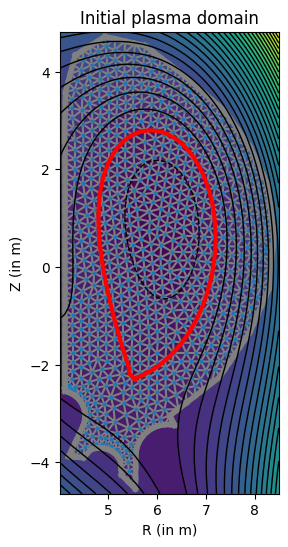

In [7]:
Problem.initialPHI.Plot()

In [8]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX

Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
                                  

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""    

"""
def PSI0(X):
    return
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

"\ndef PSI0(X):\n    return\nProblem.initialPSI = InitialGuess(PROBLEM = Problem,\n                                  PSI_GUESS = 'OTHER',\n                                  PSI0 = PSI0)\n"

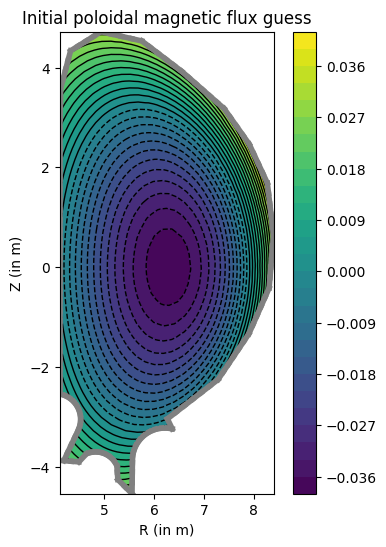

In [9]:
Problem.initialPSI.Plot()

In [10]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# PROFILES MODEL
# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Problem.mu0*(R0**2)*q0*kappa)

Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'PROFILES',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

"\n# USER DEFINED MODEL\ndef Jphi(X,PSI):\n    return 6*X[0]\nProblem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,\n                                     MODEL = 'OTHER',\n                                     Jphi = Jphi,\n                                     PSIdependent = False)\n"

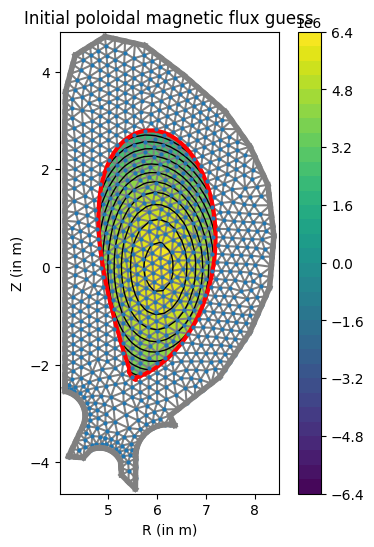

In [11]:
Problem.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017036638942055492 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1968502217357368 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·5.080004437802759
Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


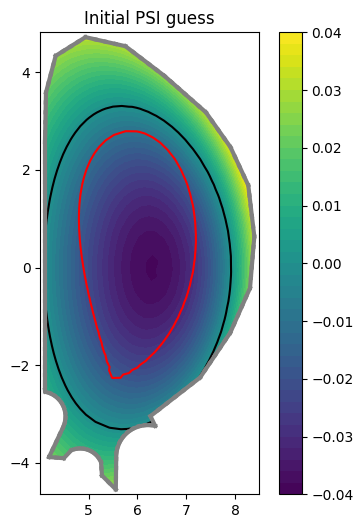

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05754225 0.41535143]  (ELEMENT  1127 ) WITH VALUE PSI_0 =  [-17.52597571]
SADDLE POINT AT  [ 4.86577785 -3.26845942]  (ELEMENT  178 ) WITH VALUE PSI_X =  [-99.61110994]


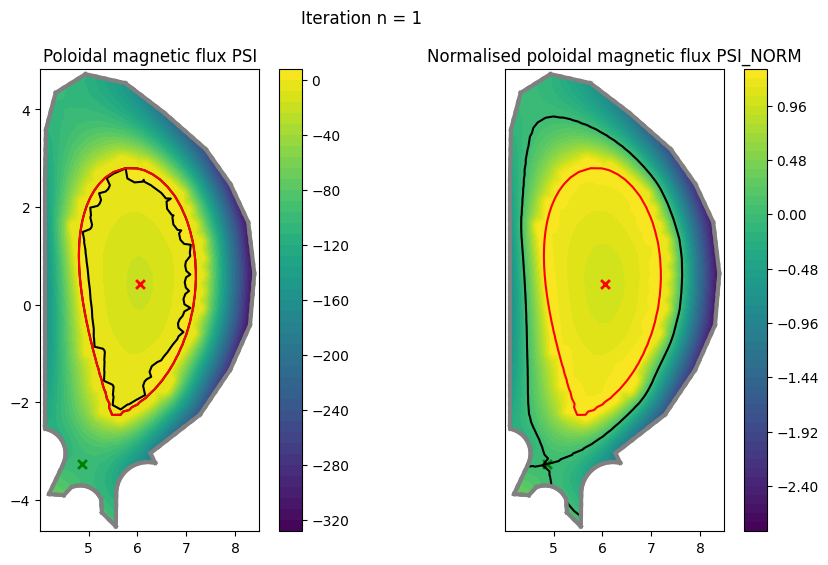

Internal iteration =  1 , PSI_NORM residu =  1.015669058868075
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.04612954 0.67870836]  (ELEMENT  1417 ) WITH VALUE PSI_0 =  [518.94047004]
SADDLE POINT AT  [ 4.95033746 -2.7481878 ]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.42986193]


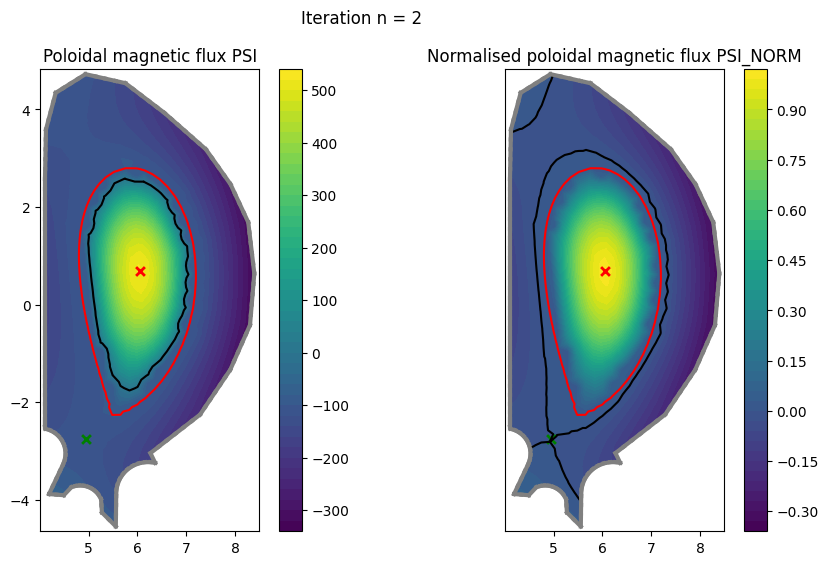

Internal iteration =  2 , PSI_NORM residu =  2.7005986384054994
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05287815 0.619686  ]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [429.39899416]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94315556 -2.7348326 ]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.41648874]


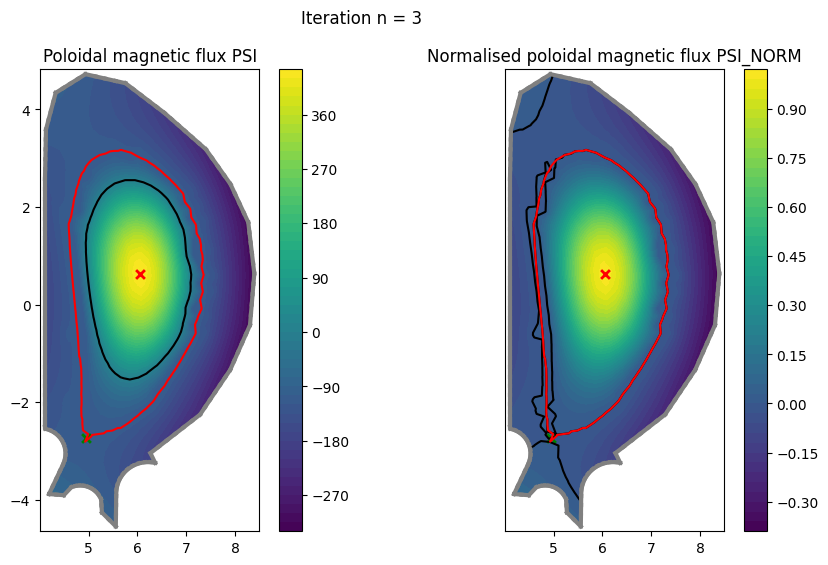

Internal iteration =  3 , PSI_NORM residu =  0.1374086656318095
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05404507 0.61500229]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [424.73824907]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94300954 -2.73512481]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.40224582]


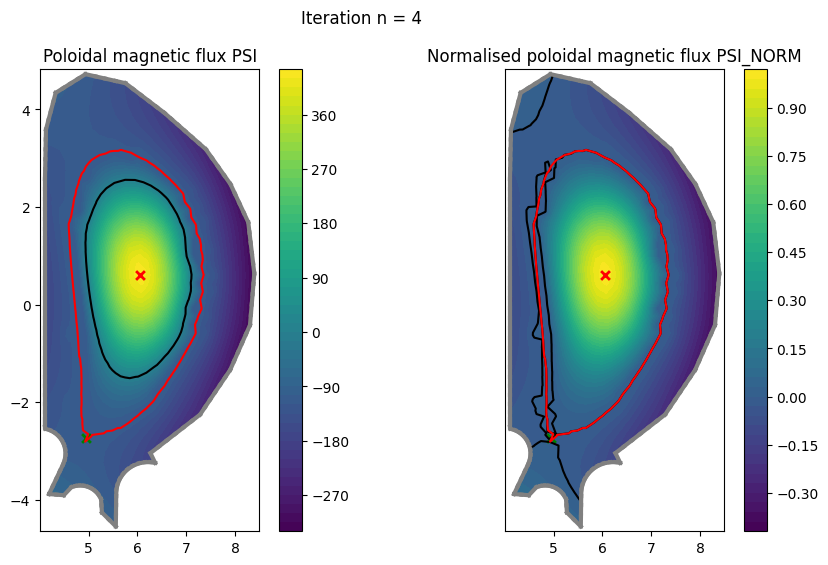

Internal iteration =  4 , PSI_NORM residu =  0.013630746507947291
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05378137 0.61854183]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [424.01205166]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94270152 -2.73511666]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.38789361]


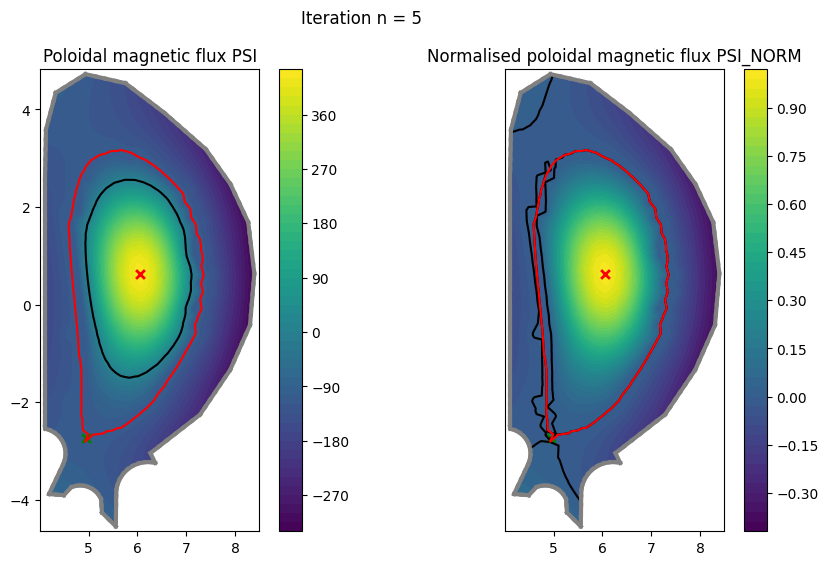

Internal iteration =  5 , PSI_NORM residu =  0.0038263572842151365
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05338761 0.62255633]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [423.63232958]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94231042 -2.73508841]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.37349019]


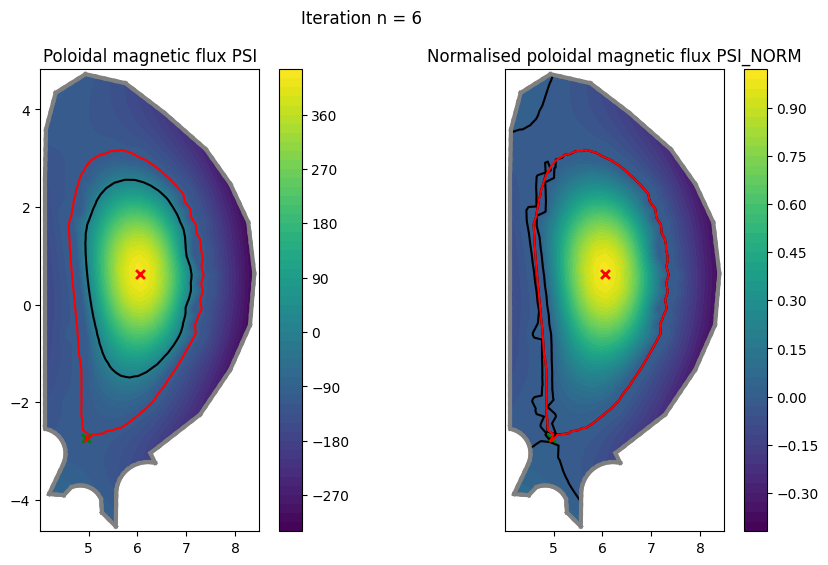

Internal iteration =  6 , PSI_NORM residu =  0.0018297095283656294
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05310502 0.62551435]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [423.45894517]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94193133 -2.73508109]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.35903962]


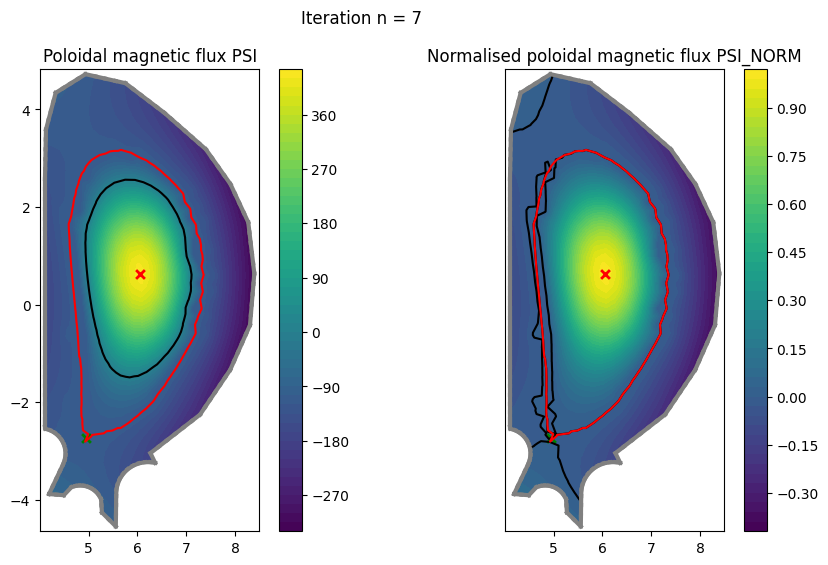

Internal iteration =  7 , PSI_NORM residu =  0.0010016608133192274
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05292692 0.62744549]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [423.39242462]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94156441 -2.73508962]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.34454098]


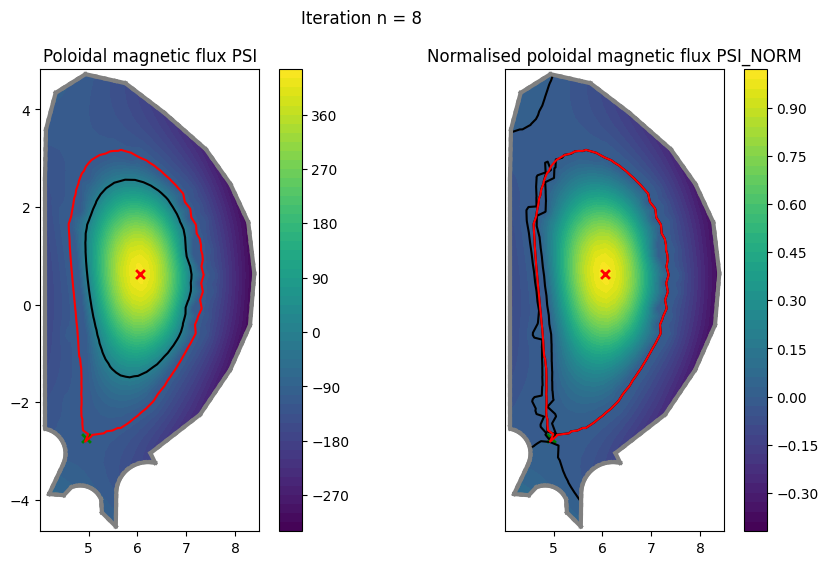

Internal iteration =  8 , PSI_NORM residu =  0.0005753129226390516
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05281824 0.62864797]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [423.37234994]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94119921 -2.73510709]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.32999268]


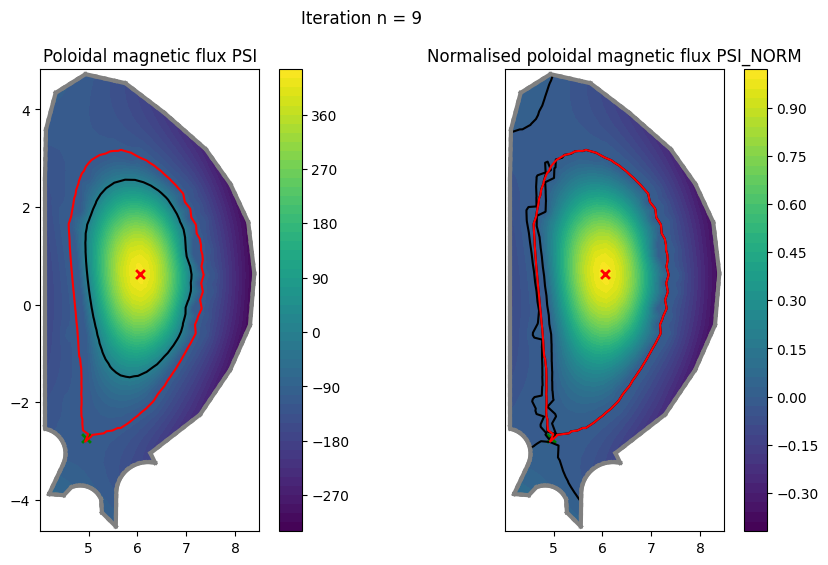

Internal iteration =  9 , PSI_NORM residu =  0.00033914538118130566
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.05275258 0.62938118]  (ELEMENT  1419 ) WITH VALUE PSI_0 =  [423.37167431]
ERROR IN SADDLE POINT HESSIAN
SADDLE POINT AT  [ 4.94082818 -2.73512932]  (ELEMENT  188 ) WITH VALUE PSI_X =  [-114.31539276]


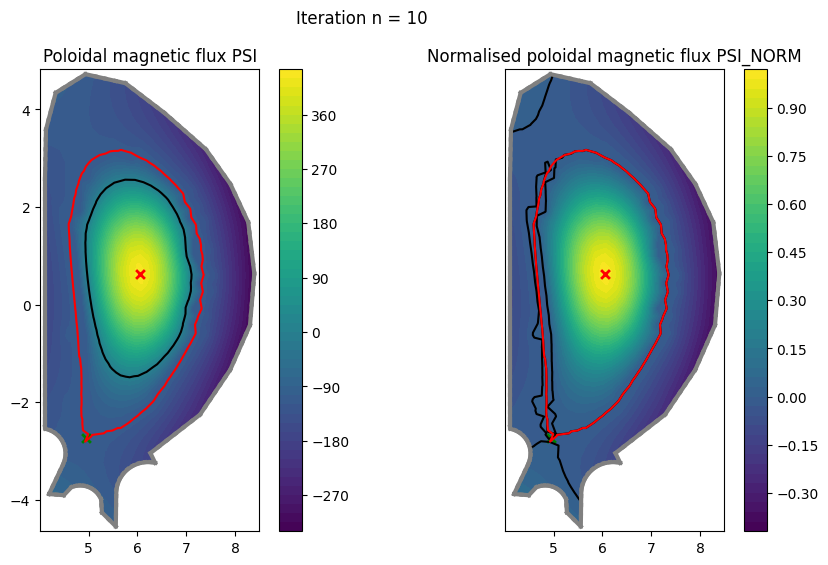

Internal iteration =  10 , PSI_NORM residu =  0.00020453376997701055
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

KeyboardInterrupt: 

In [12]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-PROFILES-ITFW'
#CASE = 'TS-FREE-PROFILES-ITFW-2'
#CASE = 'TS-FREE-PROFILES-ITFW-3'       
#CASE = 'TS-FREE-PROFILES-RECTANGLE'
#CASE = 'TS-FREE-PROFILES-FREEGS' 

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI(CASE)